In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.utils import shuffle

data = pd.read_csv('ML-CUP20-TR.csv',sep=',',index_col=0)
data = data.to_numpy()
tx = data[:,:-2]
ty = data[:,-2:]
tx.shape, ty.shape

((1523, 10), (1523, 2))

In [ ]:
from MLP import *
from utils import proximal_bundle_method

In [ ]:
errors_m = []
iterations_m = []
times_m = []

errors_b = []
iterations_b = []
times_b = []

for _ in range(10):
  n = MLP(  Nh=[10], Nu=10, Ny=2, f='tanh', f_out='ide', w_scale=2, w_range=.7)
  init_w = np.copy(n.w)
  # train the net with momentum training
  g_m,e_m,t_m,ep_m = n.momentum_train(tx, ty,alpha=1e-02,beta=0.5,epsilon=1e-12,tresh=.01,max_epochs=2000)
  errors_m.append(e_m[-1])
  iterations_m.append(ep_m)
  times_m.append(t_m[-1])

  n.w = init_w

  # train the network with bundle method
  g_b, e_b, t_b,ep_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12,epsilon=1e-02,max_epochs=200)
  errors_b.append(e_b[-1])
  iterations_b.append(ep_b)
  times_b.append(t_b[-1])

optimal
0.009890700816890434
0.009890700816890434


In [ ]:
print(errors_m )
print(iterations_m )
print(times_m)

print(errors_b) 
print(iterations_b) 
print(times_b) 

print(' MOMENTUM ')
best_m = min(errors_m)
print('best',best_m)
print('mean',np.mean(errors_m))
print('median',np.median(errors_m))
print('variance',np.var(errors_m))

print()
print(' BUNDLE ')
best_b = min(errors_b)
print('best',best_b)
print('mean',np.mean(errors_b))
print('median',np.median(errors_b))
print('variance',np.var(errors_b))

print()
best = min([best_m,best_b])
print(best)

[9.896095069660802, 10.292412859243216, 11.156000884891796, 9.554035104885031, 11.65753611691054, 9.557234562179504, 10.058089180814966, 10.15931614304806, 9.738042867016983, 9.77643133580715]
[217, 218, 261, 186, 221, 227, 198, 278, 260, 253]
[48.31267589299932, 47.98831508999865, 58.67110402800063, 42.28189942600147, 52.17983576500046, 52.569831618000535, 45.73540941199826, 67.62476631100071, 59.494054789000074, 56.916999929002486]
[10.795962270388195, 10.566406871949077, 11.1563131954772, 10.402724035150342, 9.664270170200611, 10.285956174436555, 9.391671413035278, 11.508237206993046, 9.353328912275039, 9.596937663395789]
[201, 188, 194, 201, 174, 201, 201, 201, 161, 152]
[131.79448015799971, 121.46345690599992, 126.52266488099849, 135.47360662699975, 112.27426924300016, 137.75318415899892, 136.22408870799882, 131.07458172299812, 96.18750199200076, 90.99938840300092]
 MOMENTUM 
best 9.554035104885031
mean 10.184519412445805
median 9.977092125237885
variance 0.43818777979360257

 BUN

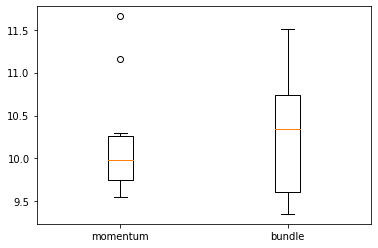

In [ ]:
_ = plt.boxplot((errors_m,errors_b), labels=['momentum','bundle'])

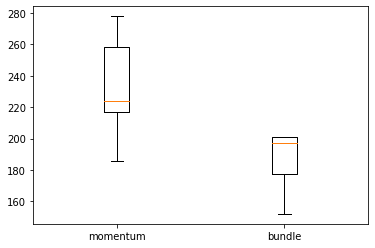

In [ ]:
_ = plt.boxplot((iterations_m,iterations_b), labels=['momentum','bundle'])

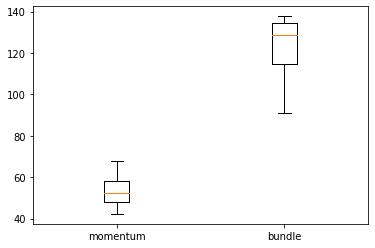

In [ ]:
_ = plt.boxplot((times_m,times_b), labels=['momentum','bundle'])

In [ ]:
b = 9.353328912275039

n = MLP(  Nh=[10], Nu=10, Ny=2, f='tanh', f_out='ide', w_scale=2, w_range=.7)

# now i train my net. In this case i use classical momentum with no regularization. after training i plot some convergence-curves 
# using data i collected during training

init_w = np.copy(n.w)

# train the net with momentum training
g_m,e_m,t_m,ep_m = n.momentum_train(tx, ty,alpha=1e-02,beta=0.5,epsilon=1e-5,tresh=.01,max_epochs=2000)

n.w = init_w

# train the network with bundle method
from utils import proximal_bundle_method
g_b, e_b, t_b,ep_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12,epsilon=1e-02,max_epochs=200)

e_b[-1], e_m[-1]

optimal
0.00984002863645138
0.00984002863645138


In [ ]:
def correct(es,b):
  for i in range(len(es)):
    es[i] = abs(es[i] - b )/b

correct(e_m, best)
correct(e_b, best)
print(e_b)
print(e_m)

[186.79678448731033, 144.25799848140426, 62.78286995054244, 9.412236203172526, 9.412236203172526, 9.412236203172526, 6.397566793110358, 3.7715783988166645, 3.7715783988166645, 2.4939890271864886, 1.6773603783136428, 1.6773603783136428, 1.012467983855772, 1.012467983855772, 1.012467983855772, 0.912887652084529, 0.912887652084529, 0.7830118991317514, 0.6254626835633507, 0.6254626835633507, 0.546764942288522, 0.546764942288522, 0.4593378578982814, 0.4593378578982814, 0.43721338984285996, 0.43721338984285996, 0.37113221113714545, 0.3449415804151288, 0.3449415804151288, 0.3323922930211242, 0.26395758198167324, 0.26395758198167324, 0.26395758198167324, 0.25275080716396275, 0.25275080716396275, 0.25275080716396275, 0.22168996299915128, 0.21603474862492147, 0.21603474862492147, 0.21603474862492147, 0.18815233800868852, 0.18815233800868852, 0.17557366736488572, 0.17557366736488572, 0.15798862105127512, 0.1524951035659811, 0.13636204869476665, 0.13636204869476665, 0.10721680560745181, 0.10721680

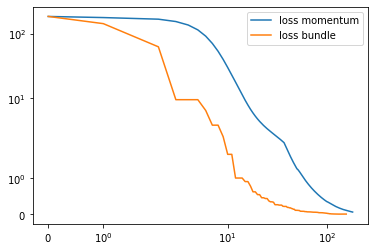

In [ ]:
# plot the results with iterations
plt.plot( e_m,label='loss momentum')
plt.plot( e_b,label='loss bundle')
plt.yscale('log')
plt.xscale('log')
plt.legend()

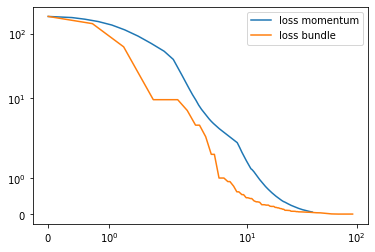

In [ ]:
# plot the results with time
plt.plot(t_m, e_m,label='loss momentum')
plt.plot(t_b, e_b,label='loss bundle')
plt.yscale('log')
plt.xscale('log')
plt.legend()